In [2]:
import inference_gym.using_jax as gym
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
sys.path.append('./sampler-comparison')
sys.path.append('../../')
from sampler_comparison.samplers import samplers
import seaborn as sns



2025-02-16 18:03:18.565938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739757798.581437  492904 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739757798.586224  492904 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-16 18:03:18.604915: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sampler_evaluation.models import models
from sampler_evaluation.models.standardgaussian import Gaussian

samples, metadata = samplers['nuts'](return_samples=True)(
        model=gym.targets.Banana(), 
        num_steps=10000,
        initial_position=jax.random.normal(jax.random.key(0), shape=(2,)), 
        key=jax.random.PRNGKey(0))


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


['debug.ipynb', 'demo.ipynb']


/global/homes/r/reubenh/.conda/envs/jax2024/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:68: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/global/homes/r/reubenh/.conda/envs/jax2024/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:68: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/global/homes/r/reubenh/.conda/envs/jax2024/lib/

AttributeError: 'jaxlib.xla_extension.ArrayImpl' object has no attribute 'position'

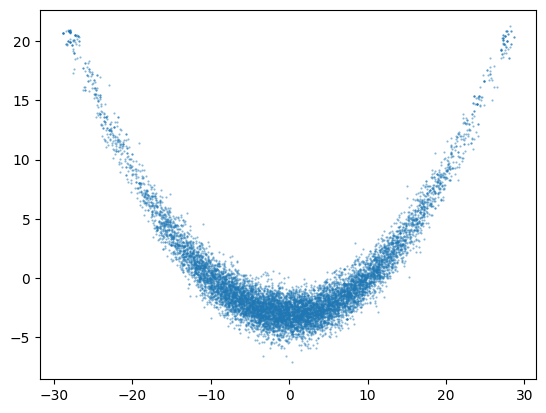

In [16]:
# scatter plot of samples
plt.scatter(samples[:,0], samples[:,1], alpha=0.5, s=0.3)

In [3]:
import itertools
import os
import pandas as pd
from sampler_comparison.samplers import samplers
from sampler_evaluation.models import models

df = pd.concat([pd.read_csv(os.path.join('..','results', f'{sampler}_{model}.csv')) for sampler, model in itertools.product(samplers, models)], ignore_index=True)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


['debug.ipynb', 'demo.ipynb']


/global/homes/r/reubenh/.conda/envs/jax2024/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:68: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/global/homes/r/reubenh/.conda/envs/jax2024/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:68: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/global/homes/r/reubenh/.conda/envs/jax2024/lib/

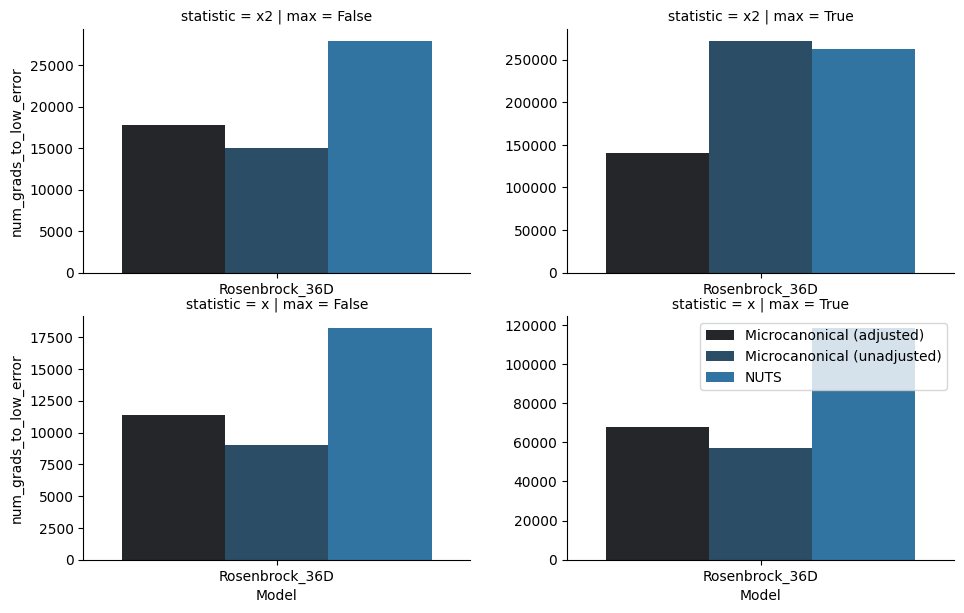

,Unnamed: 0,Sampler,Model,num_grads_to_low_error,max,statistic,num_tuning_grads,L,step_size,PrettyName,total_num_grads_to_low_error
0,0,adjusted_microcanonical,Banana,2.360854e+04,True,x2,1.126071e+05,5.428961,0.120926,Microcanonical (adjusted),1.362157e+05
1,1,adjusted_microcanonical,Banana,8.551126e+03,False,x2,1.126071e+05,5.428961,0.120926,Microcanonical (adjusted),1.211582e+05
2,2,adjusted_microcanonical,Banana,2.639695e+04,True,x,1.126071e+05,5.428961,0.120926,Microcanonical (adjusted),1.390041e+05
3,3,adjusted_microcanonical,Banana,1.138601e+04,False,x,1.126071e+05,5.428961,0.120926,Microcanonical (adjusted),1.239931e+05
4,0,adjusted_microcanonical,Gaussian_100D,3.288323e+03,True,x2,1.810623e+04,9.355879,5.685262,Microcanonical (adjusted),2.139455e+04
...,...,...,...,...,...,...,...,...,...,...,...
67,3,nuts,Rosenbrock_36D,1.824882e+04,False,x,1.184988e+07,5.379052,0.045563,NUTS,1.186813e+07
68,0,nuts,Neals_Funnel,inf,True,x2,4.988309e+05,2.458815,0.074881,NUTS,inf
69,1,nuts,Neals_Funnel,4.689010e+03,False,x2,4.988309e+05,2.458815,0.074881,NUTS,5.035199e+05
70,2,nuts,Neals_Funnel,inf,True,x,4.988309e+05,2.458815,0.074881,NUTS,inf


In [13]:
import numpy as np


def display_results(model_name,df, include_tuning=False):

  df["PrettyName"] = df["Sampler"].apply({"nuts": "NUTS", "unadjusted_microcanonical": "Microcanonical (unadjusted)", "adjusted_microcanonical": "Microcanonical (adjusted)"}.get)
  df["total_num_grads_to_low_error"] = df["num_grads_to_low_error"] + df["num_tuning_grads"]
  df = df[df["Model"] == model_name]

  g = sns.FacetGrid(df,
              col='max',
              row="statistic",
              sharex=False,
              sharey=False,
              height=4,
             )
  g = g.map(sns.barplot, 'Model',  'total_num_grads_to_low_error' if include_tuning else "num_grads_to_low_error", "PrettyName",  
            hue_order=np.unique(df["PrettyName"]), 
            order=np.unique(df["Model"]),
            # log_scale=True,
            palette='dark:#1f77b4'
  )
  plt.legend()
  plt.gcf().set_size_inches(10, 6)
  plt.show()

# display_results("German_Credit", df, include_tuning=False)
# display_results("Brownian_Motion", df, include_tuning=False)
# display_results("Neals_Funnel", df, include_tuning=False)
display_results("Rosenbrock_36D", df, include_tuning=False)
display(df)